In [4]:
# In "CNN with Keras" we have trained the model and saved it in model.h5 file
# Now use that trainded model to make predictions.
# I have collected few images from internet and cropped them into 28x28 pixels.
# Because that's what our trained model requires.

In [83]:
#Library Required
import keras
from keras import models
import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np

In [194]:
# Creating an empty array to collect all prediction images
imgs = []

# This directory contains our images
image_dir = './prediction_images'

#Reading images and appending them into imgs array
for img in glob.glob( image_dir + '/*jpg'):
    # Using PIL.Images to open the image and convert that into grayscale. 'L' is for grayscale
    picture = Image.open(img).convert('L')
    
    #Converting it to numpy array
    picture = np.array(picture)
    
    #Dividing every value by 255 because model was trained over float values between 0 and 1.
    picture = picture / 255
    
    # Appending images to imgs array
    imgs.append(picture)

#Convert our imgs array to numpy array to ease our work
imgs = np.array(imgs)

In [195]:
#Making Predictions
model = models.load_model('model.h5')

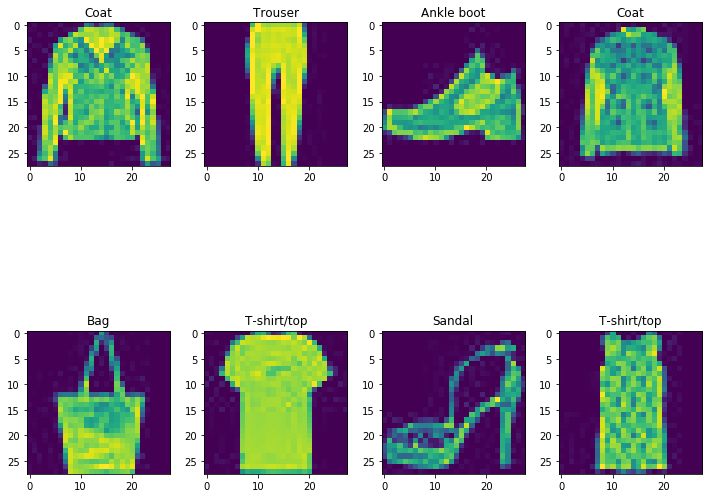

In [196]:
pred_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig = plt.figure(figsize=(10,10))

for i, img in enumerate(imgs):
    
    # Making Subplots to display multiple image outputs
    plt.subplot(2,4,i+1)
    
    # Showing the image
    plt.imshow(img)
    
    # Before prediction we need to convert our image dimention into a 4-D tensor. Because that is required by the model
    img = img.reshape(1,28,28,1)
    
    #Making prediction
    pred = model.predict(img)
    
    # Model Output was by softmax function so that contains probability of all the classes.
    # Picking the max propability class
    plt.title(pred_labels[np.argmax(pred)])
    
fig.tight_layout()
plt.show()
